In [1]:
## insure in
%matplotlib inline
## run this to prevent scrolling in individual cells
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

In [2]:
%run ../HETDEX_API/hetdex_api/detections.py

In [3]:
detects = Detections('hdr1')

In [4]:
detectid = 1000004009

In [6]:
detects.get_gband_mag(detectid)

sdss2010-g
float64
19.293946177596467


In [ ]:
#detects.mags = np.zeros(np.size(detects.detectid))
#for ix, detectid_i in enumerate(detects.detectid):
#    try:
#        detects.mags[ix] = detects.get_gband_mag(detectid_i)
#    except:
#        detects.mags[ix] = np.nan

In [7]:
%run ../HETDEX_API/hetdex_api/detwidgets.py

Either select a specific field or multiple fields (command-click to select multiple fields):



U2VsZWN0TXVsdGlwbGUoZGVzY3JpcHRpb249dSdGaWVsZDonLCBpbmRleD0oMCwpLCBvcHRpb25zPSgnYWxsJywgJ2RleC1zcHJpbmcnLCAnZGV4LWZhbGwnLCAnY29zbW9zJywgJ2VncycsICfigKY=


Or manually enter an RA, DEC and aperture:



SEJveChjaGlsZHJlbj0oVkJveChjaGlsZHJlbj0oTGFiZWwodmFsdWU9dSdSQSAoZGVncmVlcyknLCBsYXlvdXQ9TGF5b3V0KGhlaWdodD11JzM1cHgnLCB3aWR0aD11JzEwMCUnKSksIExhYmXigKY=


Checkbox(value=False, description=u'Check to Select from aperture')

You may also wish to consider some down selections:


SEJveChjaGlsZHJlbj0oVkJveChjaGlsZHJlbj0oTGFiZWwodmFsdWU9dScnLCBsYXlvdXQ9TGF5b3V0KGhlaWdodD11JzM1cHgnLCB3aWR0aD11JzEwMCUnKSksIExhYmVsKHZhbHVlPXUnc3TigKY=


Button(button_style=u'success', description=u'Select Detections', style=ButtonStyle())

In [ ]:
sel = detects.query_by_pickle('query.pickle')
np.sum(sel)

In [8]:
# previously I saved a query with 
#
#limits.__dict__ :
#{'aperture_flag': False,
# 'chi2_high': 0.0,
# 'chi2_low': 0.0,
# 'dec': 0.0,
# 'field': ('cosmos',),
# 'flux_high': 0.0,
# 'flux_low': 0.0,
# 'linewidth_high': 0.0,
# 'linewidth_low': 0.0,
# 'ra': 0.0,
# 'rad': 0.0,
# 'sn_high': 50.0,
# 'sn_low': 6.0,
# 'wave_high': 4000.0,
# 'wave_low': 3500.0}
#limits = pickle.load(open( 'query.pickle', "rb" ) )
#maskdex = detects.query_by_dictionary(limits)
#outfile = open('dex.pickle', 'wb')
#pickle.dump(limits, outfile)
#outfile.close()
maskdex = detects.query_by_pickle('dex.pickle')

Subselecting for field(s): ('dex-spring', 'dex-fall')


In [9]:
# previously I saved a query with 
#
#limits.__dict__ :
#{'aperture_flag': False,
# 'chi2_high': 0.0,
# 'chi2_low': 0.0,
# 'dec': 0.0,
# 'field': ('cosmos',),
# 'flux_high': 0.0,
# 'flux_low': 0.0,
# 'linewidth_high': 0.0,
# 'linewidth_low': 0.0,
# 'ra': 0.0,
# 'rad': 0.0,
# 'sn_high': 50.0,
# 'sn_low': 6.0,
# 'wave_high': 4000.0,
# 'wave_low': 3500.0}
#limits=pickle.load(open( 'query.pickle', "rb" ) )
#maskcosmos = detects.query_by_dictionary(limits)
#outfile = open('cosmos.pickle', 'wb')
#pickle.dump(limits, outfile)
#outfile.close()
maskcosmos = detects.query_by_pickle('cosmos.pickle')

Subselecting for field(s): ('cosmos',)


In [10]:
np.sum(maskdex), np.sum(maskcosmos)

(88119, 4238)

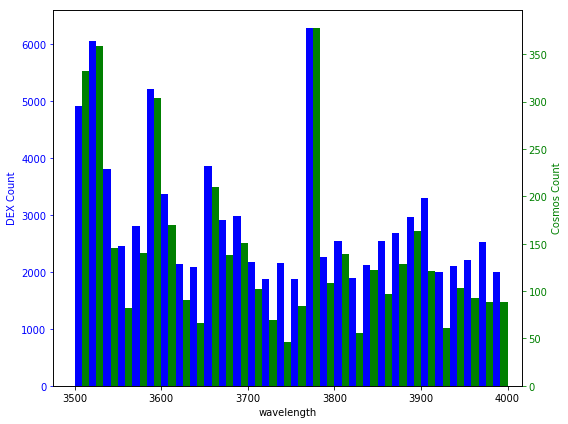

In [11]:
colors = ['b','g']
#sets up the axis and gets histogram data
fig, ax1 = plt.subplots(figsize=(8,6))
ax2 = ax1.twinx()
y1 = detects.wave[maskdex]
y2 = detects.wave[maskcosmos]
nbins = 30
ax1.hist([y1, y2], color=colors, bins=nbins)
n, bins, patches = ax1.hist([y1,y2], bins=nbins)
ax1.cla() #clear the axis

#plots the histogram data
width = (bins[1] - bins[0]) *0.5
bins_shifted = bins + width
ax1.bar(bins[:-1], n[0], width, align='edge', color=colors[0])
ax2.bar(bins_shifted[:-1], n[1], width, align='edge', color=colors[1])

#finishes the plot
ax1.set_ylabel("DEX Count", color=colors[0])
ax2.set_ylabel("Cosmos Count", color=colors[1])
ax1.set_xlabel('wavelength')
ax1.tick_params('y', colors=colors[0])
ax2.tick_params('y', colors=colors[1])
plt.tight_layout()
plt.savefig('count_vs_wave.png')

In [12]:
np.argmax(n)
print bins[16:18]

[3766.666 3783.332]


In [13]:
#limits3 = pickle.load( open( 'query.pickle', "rb" ) )
#limits3.__dict__
#
#{'aperture_flag': False,
# 'chi2_high': 0.0,
# 'chi2_low': 0.0,
# 'dec': 0.0,
# 'field': ('dex-spring', 'dex-fall'),
# 'flux_high': 0.0,
# 'flux_low': 0.0,
# 'linewidth_high': 0.0,
# 'linewidth_low': 0.0,
# 'ra': 0.0,
# 'rad': 0.0,
# 'sn_high': 50.0,
# 'sn_low': 6.0,
# 'wave_high': 3785.0,
# 'wave_low': 3765.0}
#outfile = open('mask3770.pickle', 'wb')
#pickle.dump(limits3, outfile)
#outfile.close()
#mask3770 = detects.query_by_dictionary(limits3)

In [14]:
mask3770 = detects.query_by_pickle('mask3770.pickle')
np.sum(mask3770)

Subselecting for field(s): ('dex-spring', 'dex-fall')


6854

In [15]:
detects.detectid[mask3770][6000:6010]

array([1000621289, 1000621293, 1000621295, 1000621315, 1000621370,
       1000621435, 1000621445, 1000621633, 1000621721, 1000621762])

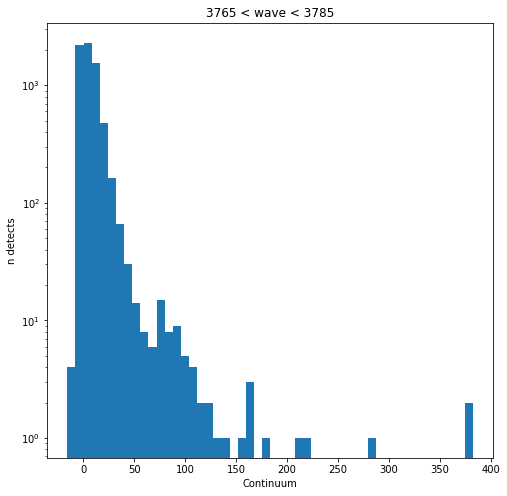

In [16]:
plt.figure(figsize=(8,8))
plt.hist(detects.continuum[mask3770], bins=50, log=True)
plt.xlabel('Continuum')
plt.ylabel('n detects')
plt.title('3765 < wave < 3785')
plt.savefig('stars_conthist.png')

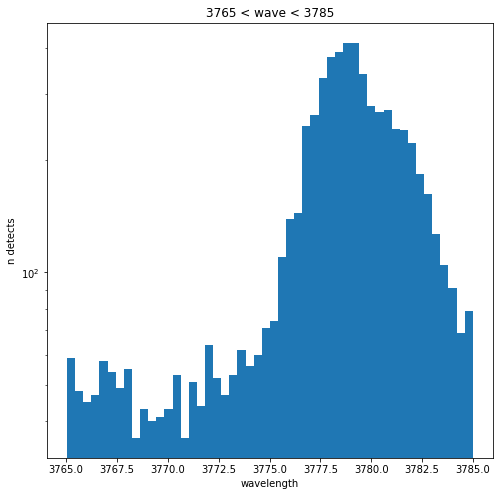

In [17]:
plt.figure(figsize=(8,8))
plt.hist(detects.wave[mask3770], bins=50, log=True)
plt.xlabel('wavelength')
plt.ylabel('n detects')
plt.title('3765 < wave < 3785')
plt.savefig('stars_wavehist.png')

In [18]:
maskremove = mask3770 * (detects.wave > 3775) * (detects.wave < 3785) * (detects.continuum > 1) * (detects.continuum < 3)
detects.detectid[maskremove]
np.sum(maskremove)

199

In [6]:
np.sum(highcont)
for detecti in detects.detectid[highcont]:
    tarname = op.join(config.elix_dir,"erg_%d.tar" %(detecti//100000))
    file_pdf = op.join("egs_%d" %(detecti//100000), str(detecti) + '.pdf')
    os.system('tar -xvf '+ tarname + ' ' + file_pdf)
    os.system('mv '+ file_pdf + ' veryhighcont/')

In [19]:
#sel = detects.query_by_pickle('query.pickle') # queried 1 arcmin at 172.212036,51.042034
np.sum(sel)
for detecti in detects.detectid[sel]:
    tarname = op.join(config.elix_dir,"erg_%d.tar" %(detecti//100000))
    file_pdf = op.join("egs_%d" %(detecti//100000), str(detecti) + '.pdf')
    os.system('tar -xvf '+ tarname + ' ' + file_pdf)
    os.system('mv '+ file_pdf + ' midccd_cont3to10/')

In [20]:
detects.continuum[sel]

array([ 41.31,  24.93,  14.39, 109.55, 107.57,  19.91,  19.93,  11.95,
         1.07,  14.08,  15.89,   7.43,  15.85,  21.9 ,  16.02,  14.87,
        12.77,   4.53,  18.62,  15.59,   7.34,  23.8 ,  21.81,  31.74,
        17.18,  15.97,  19.65], dtype=float32)

(array([ 2.,  0.,  6.,  0.,  0.,  3., 14.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  7.,
         0.,  1.,  0.,  1.,  0., 19.,  0.,  5.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 25.,  0.,  1., 16.,
         5., 19., 15.,  2.,  0.,  0.,  1., 53.,  6.,  0., 23.,  4.,  2.,
         0.,  0.,  0.,  0.,  0., 10.,  7.,  5.,  0.,  0.,  0., 55.,  0.,
         4.,  4.,  0.,  0.,  0.,  0.,  2.,  1.,  2.,  0.,  0.,  4.,  0.,
        18.,  5.,  2.,  2., 39.,  2.,  5., 20.,  4.]),
 array([3540.71  , 3560.532 , 3580.354 , 3600.176 , 3619.998 , 3639.82  ,
        3659.642 , 3679.4639, 3699.286 , 3719.108 , 3738.93  , 3758.752 ,
        3778.574 , 3798.396 , 3818.218 , 3838.04  , 3857.862 , 3877.684 ,
        3897.506 , 3917.328 , 3937.15  , 3956.972 , 3976.794 , 3996.616 ,
        4016.438 , 4036.26  , 4056.082 , 4075.904 , 4095.726 , 4115.548 ,
        4135.37  , 4155.192 , 4175.014 , 4194.836 , 4214.658 , 4

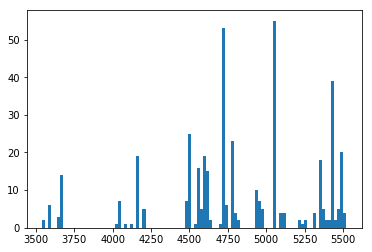

In [25]:
plt.hist(detects.wave[highcont], bins=100)

In [19]:
detects_contgt3 = detects.detectid[maskremove]

(array([ 5.,  2.,  6.,  4.,  5.,  0.,  0.,  4.,  0.,  3.,  1.,  1.,  2.,
         1.,  0.,  4.,  3.,  1.,  0.,  3.,  2.,  7.,  3.,  1.,  4.,  2.,
         2.,  3.,  7.,  3.,  8.,  4.,  5.,  2.,  2.,  5.,  4.,  8.,  6.,
        15.,  7.,  3.,  5.,  7.,  4.,  8.,  3., 11.,  6.,  7.]),
 array([1.05  , 1.0888, 1.1276, 1.1664, 1.2052, 1.244 , 1.2828, 1.3216,
        1.3604, 1.3992, 1.438 , 1.4768, 1.5156, 1.5544, 1.5932, 1.632 ,
        1.6708, 1.7096, 1.7484, 1.7872, 1.826 , 1.8648, 1.9036, 1.9424,
        1.9812, 2.02  , 2.0588, 2.0976, 2.1364, 2.1752, 2.214 , 2.2528,
        2.2916, 2.3304, 2.3692, 2.408 , 2.4468, 2.4856, 2.5244, 2.5632,
        2.602 , 2.6408, 2.6796, 2.7184, 2.7572, 2.796 , 2.8348, 2.8736,
        2.9124, 2.9512, 2.99  ], dtype=float32),
 <a list of 50 Patch objects>)

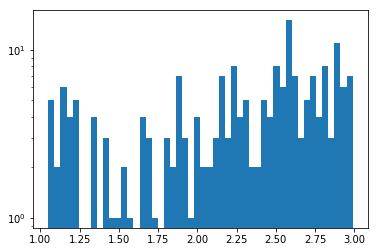

In [22]:
np.median(detects.continuum[maskremove])
plt.hist(detects.continuum[maskremove], bins=50, log=True)